In [1]:
#importing the machine learning libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
##loading the Montgomery County Govt project dataset
cp_data=pd.read_excel('MIS581_project_data.xls', Sheet='MoCoGDP_vs_Variables')
cp_data

,observation_date,county_gdp,county_resident_pop,unemployment_rate,house_price_index,median_household_income,fixed_mortgage_av_rate,mean_real_wages
0,2009-01-01,69062043,970647,5.325000,177.97,93774,5.036538,40.04
1,2010-01-01,73350125,975602,5.591667,175.74,88559,4.689808,27.19
2,2011-01-01,77217260,991185,5.266667,173.15,92288,4.447885,27.61
3,2012-01-01,78035625,1005079,5.191667,171.94,94365,3.657500,27.89
4,2013-01-01,77587984,1015172,4.941667,178.07,97873,3.975577,28.56
5,2014-01-01,79481547,1024617,4.375000,185.52,97279,4.249038,28.19
6,2015-01-01,84829425,1032814,3.883333,187.40,98314,3.850577,28.34
7,2016-01-01,89820468,1038846,3.450000,192.17,99604,3.654038,50.42
8,2017-01-01,92773239,1046822,3.383333,197.95,102944,3.989808,51.36
9,2018-01-01,93462880,1048478,3.175000,204.18,107758,4.544615,53.09


In [3]:
cp_data.shape


(11, 8)

In [6]:
cp_data.county_gdp.mean()


82836913.0

In [8]:
[cp_data.county_gdp]

[0     69062043
 1     73350125
 2     77217260
 3     78035625
 4     77587984
 5     79481547
 6     84829425
 7     89820468
 8     92773239
 9     93462880
 10    95585447
 Name: county_gdp, dtype: int64]

In [15]:

##Summary stats to make sense of the distribution of the variables

cp_data.describe()

,county_gdp,county_resident_pop,unemployment_rate,house_price_index,median_household_income,fixed_mortgage_av_rate,mean_real_wages
count,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000
mean,8.283691e+07,1.018177e+06,4.319697,186.576364,98433.636364,4.184650,37.837273
std,8.944807e+06,2.908515e+04,0.986480,12.650779,6464.677150,0.447054,11.878049
min,6.906204e+07,9.706470e+05,2.933333,171.940000,88559.000000,3.654038,27.190000
25%,7.740262e+07,9.981320e+05,3.416667,176.855000,94069.500000,3.893173,28.040000
50%,7.948155e+07,1.024617e+06,4.375000,185.520000,97873.000000,3.989808,28.560000
75%,9.129685e+07,1.042834e+06,5.229167,195.060000,101274.000000,4.496250,50.890000
max,9.558545e+07,1.050688e+06,5.591667,208.250000,110012.000000,5.036538,53.520000


In [16]:
#visualizing the correlations coeffs amongst the variables 
corelation=cp_data.corr()

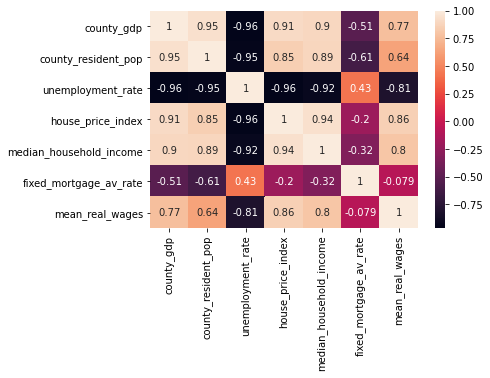

In [17]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

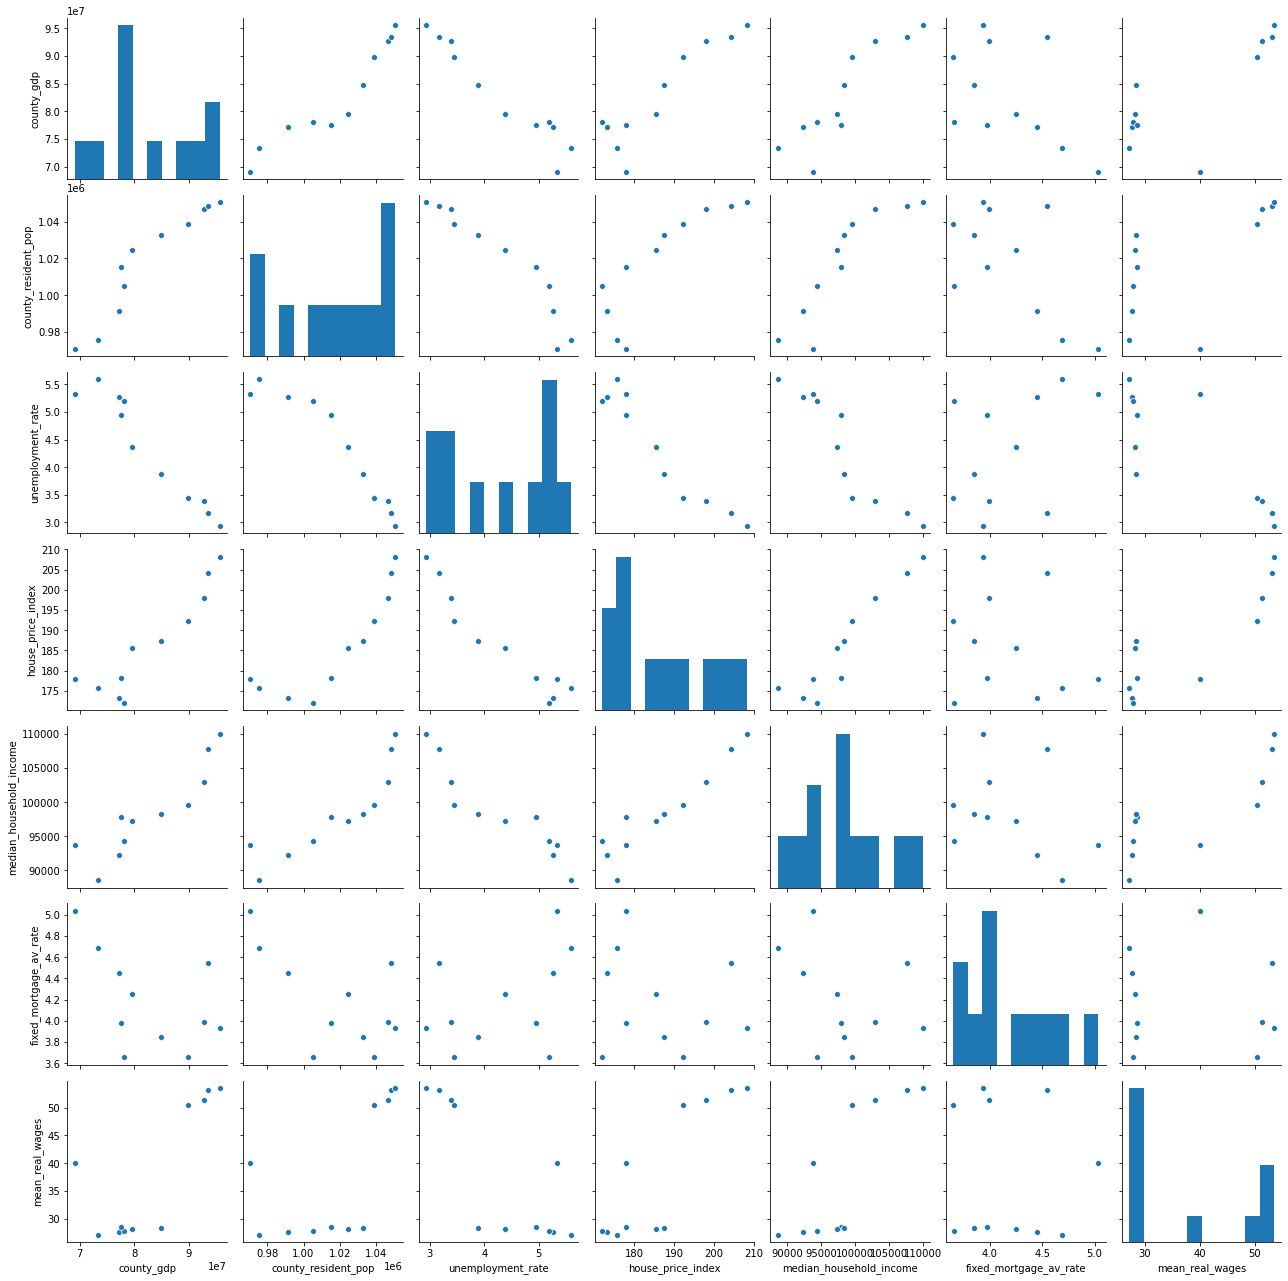

In [19]:
sns.pairplot(cp_data)

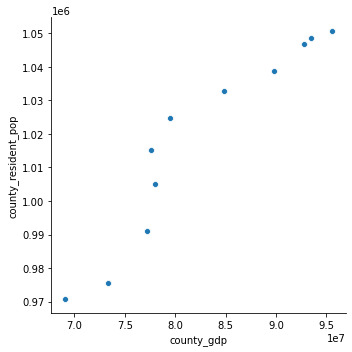

In [20]:
#visualizing the relationship between county_gdp vs county_resident_pop on a scatter plot
sns.relplot(x='county_gdp',y='county_resident_pop',data=cp_data)

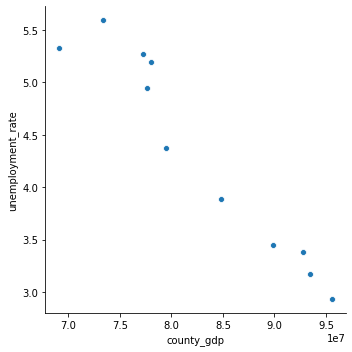

In [21]:
#visualizing the relationship between county_gdp vs unemployment_rate on a scatter plot
sns.relplot(x='county_gdp',y='unemployment_rate',data=cp_data)

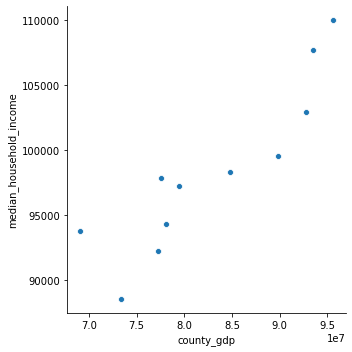

In [22]:
#visualizing the relationship between county_gdp vs median_household_income on a scatter plot
sns.relplot(x='county_gdp',y='median_household_income',data=cp_data)

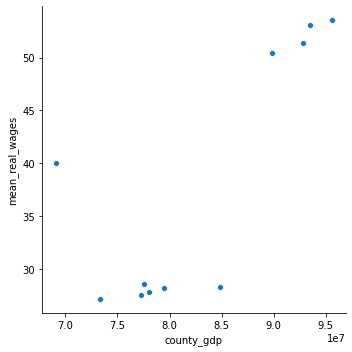

In [23]:
#visualizing the relationship between county_gdp vs mean_real_wages on a scatter plot
sns.relplot(x='county_gdp',y='mean_real_wages',data=cp_data)

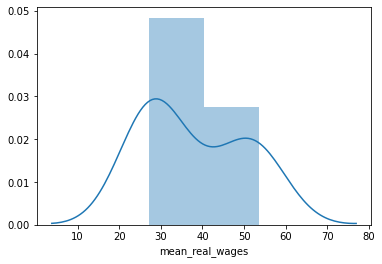

In [24]:
sns.distplot(cp_data['mean_real_wages'])

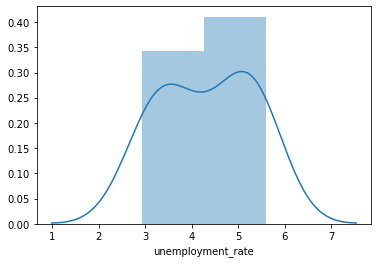

In [25]:
sns.distplot(cp_data['unemployment_rate'])

In [29]:
# Separating variables into independent and dependent variables
X=cp_data.drop(['county_gdp','observation_date'],axis=1).values
y=cp_data['county_gdp'].values

In [30]:
print(X)

[[9.70647000e+05 5.32500000e+00 1.77970000e+02 9.37740000e+04
  5.03653846e+00 4.00400000e+01]
 [9.75602000e+05 5.59166667e+00 1.75740000e+02 8.85590000e+04
  4.68980769e+00 2.71900000e+01]
 [9.91185000e+05 5.26666667e+00 1.73150000e+02 9.22880000e+04
  4.44788462e+00 2.76100000e+01]
 [1.00507900e+06 5.19166667e+00 1.71940000e+02 9.43650000e+04
  3.65750000e+00 2.78900000e+01]
 [1.01517200e+06 4.94166667e+00 1.78070000e+02 9.78730000e+04
  3.97557692e+00 2.85600000e+01]
 [1.02461700e+06 4.37500000e+00 1.85520000e+02 9.72790000e+04
  4.24903846e+00 2.81900000e+01]
 [1.03281400e+06 3.88333333e+00 1.87400000e+02 9.83140000e+04
  3.85057692e+00 2.83400000e+01]
 [1.03884600e+06 3.45000000e+00 1.92170000e+02 9.96040000e+04
  3.65403846e+00 5.04200000e+01]
 [1.04682200e+06 3.38333333e+00 1.97950000e+02 1.02944000e+05
  3.98980769e+00 5.13600000e+01]
 [1.04847800e+06 3.17500000e+00 2.04180000e+02 1.07758000e+05
  4.54461538e+00 5.30900000e+01]
 [1.05068800e+06 2.93333333e+00 2.08250000e+02 1.1

In [31]:
print(y)

[69062043 73350125 77217260 78035625 77587984 79481547 84829425 89820468
 92773239 93462880 95585447]


In [32]:
#splitting the model into a training and test dataset
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [36]:
#Fitting the multiple linear regression model on the dataset
from sklearn.linear_model import LinearRegression

In [60]:
ml=LinearRegression()
ml.fit(X_train,y_train)
print(ml.coef_)
print(ml.intercept_)
print(ml.n_jobs)
print(ml.fit)
print(ml.fit_intercept)

[ 1.59968161e+02  3.30831965e+06  4.97642686e+05 -2.67650648e+02
 -5.80961565e+06  1.47217170e+05]
-142153298.2244069
None
<bound method LinearRegression.fit of LinearRegression()>
True


In [62]:
##calculating the correlation coefficient of the independent variables

cp_data['unemployment_rate'].corr(cp_data['county_gdp'])

-0.962819232565242

In [63]:
##calculating the correlation coefficient of the independent variables
cp_data['county_resident_pop'].corr(cp_data['county_gdp'])

0.9463119293434616

In [64]:
##calculating the correlation coefficient of the independent variables
cp_data['house_price_index'].corr(cp_data['county_gdp'])

0.9123039172387212

In [66]:
##calculating the correlation coefficient of the independent variables
cp_data['mean_real_wages'].corr(cp_data['county_gdp'])

0.7739402274575206

In [67]:
##calculating the correlation coefficient of the independent variables
cp_data['median_household_income'].corr(cp_data['county_gdp'])

0.8961327477942251

In [52]:
##predicting future county GDP using the model
y_pred=ml.predict(X_test)
print(y_pred)

[79493938.7222708  92488822.63909753]


In [41]:
## To evaluate the accuracy of the model
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test,y_pred)

0.9636410546044764

Text(0.5, 1.0, 'Actual vs Predicted')

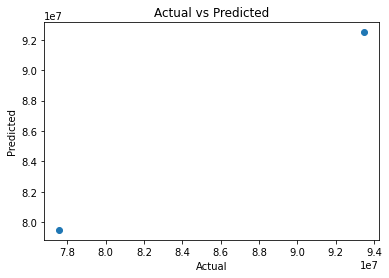

In [54]:
# Visualizing the predicted and actual values to evaluate model accuracy
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [55]:
#Evaluating model accuracy
pred_y_cp_data=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_cp_data

,Actual Value,Predicted Value,Difference
0,77587984,7.949394e+07,-1.905955e+06
1,93462880,9.248882e+07,9.740574e+05


In [68]:
## calculating the p-values of explanatory variables to test hypothesis
from scipy.stats import ttest_rel

In [70]:
_, pvalue=ttest_rel(cp_data.unemployment_rate,cp_data.county_gdp)
pvalue

3.137756280381498e-11

In [72]:
_, pvalue=ttest_rel(cp_data.county_resident_pop,cp_data.county_gdp)
pvalue

3.4399877898536675e-11

In [73]:
_, pvalue=ttest_rel(cp_data.median_household_income,cp_data.county_gdp)
pvalue

3.1546136710639345e-11

In [74]:
_, pvalue=ttest_rel(cp_data.mean_real_wages,cp_data.county_gdp)
pvalue

3.1377336168706316e-11

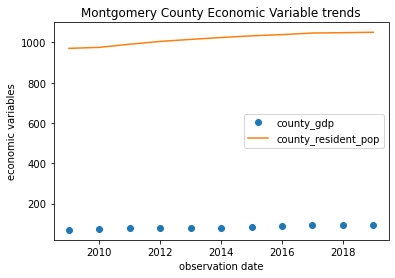

In [112]:
plt.title("Montgomery County Economic Variable trends")
plt.plot(cp_data.observation_date,cp_data.county_gdp/10**6,'o')
plt.plot(cp_data.observation_date,cp_data.county_resident_pop/10**3)
plt.xlabel("observation date")
plt.ylabel("economic variables")
plt.legend(["county_gdp","county_resident_pop",])

plt.show()

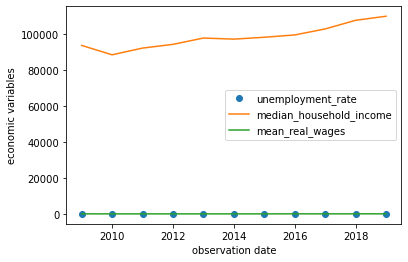

In [111]:
plt.plot(cp_data.observation_date,cp_data.unemployment_rate,'o')
plt.plot(cp_data.observation_date,cp_data.median_household_income)
plt.plot(cp_data.observation_date,cp_data.mean_real_wages)
plt.xlabel("observation date")
plt.ylabel("economic variables")
plt.legend(["unemployment_rate","median_household_income","mean_real_wages"])

plt.show()

Text(0.5, 1.0, 'Unemployment Rate trends in Montgomery County')

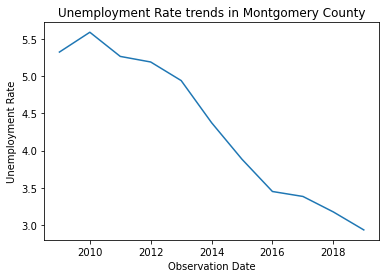

In [114]:
plt.plot(cp_data.observation_date,cp_data.unemployment_rate)
plt.xlabel("Observation Date")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate trends in Montgomery County")

Text(0.5, 1.0, 'County population trends in Montgomery County')

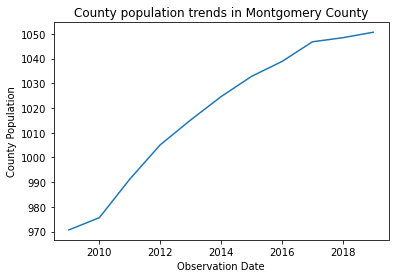

In [125]:
plt.plot(cp_data.observation_date,cp_data.county_resident_pop/10**3)
plt.xlabel("Observation Date")
plt.ylabel("County Population")
plt.title("County population trends in Montgomery County")

Text(0.5, 1.0, 'median_household_income trends in Montgomery County')

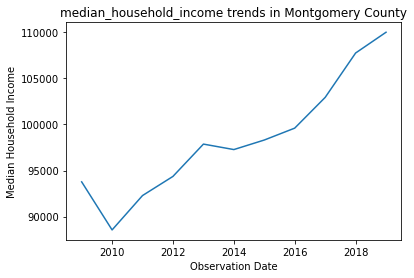

In [124]:
plt.plot(cp_data.observation_date,cp_data.median_household_income)
plt.xlabel("Observation Date")
plt.ylabel("Median Household Income")
plt.title("median_household_income trends in Montgomery County")

Text(0.5, 1.0, 'County GDP trends in Montgomery County')

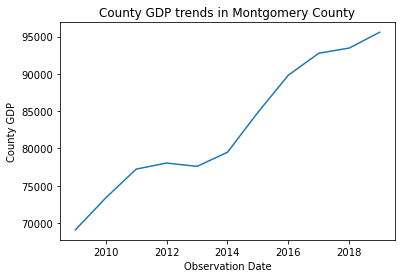

In [123]:
plt.plot(cp_data.observation_date,cp_data.county_gdp/10**3)
plt.xlabel("Observation Date")
plt.ylabel("County GDP")
plt.title("County GDP trends in Montgomery County")